<h1><center> 
    Travaux pratiques:
    
       Notebook Intégration numérique

</center></h1>

### Sommes de Darboux pour $y=x^2$ sur l'intervalle $[0,1]$

Inférieure             | Supérieure
:-------------------------:|:-------------------------:
![](data/Riemann_Integration_and_Darboux_Lower_Sums.gif)  |  ![](data/Riemann_Integration_and_Darboux_Upper_Sums.gif)


[source Wikipédia](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Darboux#:~:text=Plus%20concr%C3%A8tement%2C%20pour%20une%20subdivision,sous%2Dintervalle%20de%20la%20subdivision.)

## Exercice 1
__But :__ Déterminer une formule de quadrature aux noeuds $(c_1, c_2) = \left(\frac{1}{3}, \frac{2}{3}\right)$.

- il s'agit donc d'une formule à deux étages.
- il nous faut trouver la valeur des poids $b_1$ et $b_2$.

__Rappel:__ Une formule de quadratures à $s$ étages est d'ordre au moins $s+1$ si $\forall q \in \{1,...,s\}$
$$
\sum_{i=1}^{s} b_i c_i^{q-1} = \frac{1}{q}.
$$

In [1]:
import numpy as np
noeuds = [1/3,2/3]
s = len(noeuds)

V = np.zeros((s,s))

qs = np.zeros(s)
for ordre in range(s):
    for index, noeud in enumerate(noeuds):
        V[ordre, index] = noeud**ordre 
    qs[ordre] = 1/(ordre+1)

print('V=\n',V)
print('\nqs=\n', qs)

poids = np.linalg.inv(V) @ qs

print("\npoids=\n",poids)

V=
 [[1.         1.        ]
 [0.33333333 0.66666667]]

qs=
 [1.  0.5]

poids=
 [0.5 0.5]


> La formule de quadrature aux noeuds $\frac{1}{3}$ et $\frac{2}{3}$ est donc  :
$$
I\simeq \frac{1}{2}\left[f\left(\frac{1}{3}\right) + f\left(\frac{2}{3}\right)\right]
$$

## Exercice 2 :  Vérification numérique de l'ordre des méthodes

__Objectif :__ En s'appuyant sur l'approximation de cette intégrale (avec $p=4$), retrouver numériquement pour chaque formule de quadrature vu en cours son ordre.

$$
\int_0^1 x^p dx = \frac{1}{p+1}
$$

In [2]:
p=4
def power(x):
    """fonction x puissance p"""
    return x**p

### 2.1 Coder les différentes formules de quadratures 

In [3]:
import numpy as np

def rect_gauche(f, N, a=0, b=1):
    """Applique la méthode des rectangles a gauche pour f sur N rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(N-1):
        I += h * f(xs[i])

#     I = (h * f(xs[:-1])).sum()

    return I


def pt_milieu(f, N, a=0, b=1):
    """Applique la méthode du point milieu pour f sur N rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(N-1):
        I += h * f( (xs[i] + xs[i+1])/2 )
    return I


def simpson(f, N, a=0, b=1):
    """Applique la méthode de Simpson pour f sur N rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(N-1):
        I += h/6 * ( f(xs[i]) + 4*f( (xs[i]+xs[i+1])/2 ) + f(xs[i+1]) )
    return I


__Vérification avec 10 000 rectangles pour sur l'intervalle [0,1] pour la méthode des rectangles à gauche__ 

La valeur exacte est 1/5.

In [4]:
N = 10**4
rect_gauche(power, N )

0.19994999833349997

### 2.2 Vérification des ordres des méthodes

Pour chacune des méthodes :
- Calculer un nombre de rectangles variable, $N=10, 100, ... 10000$
- Comparer l'approximation fournie avec la valeur exacte de l'intégrale, égale à $\frac{1}{p+1}$

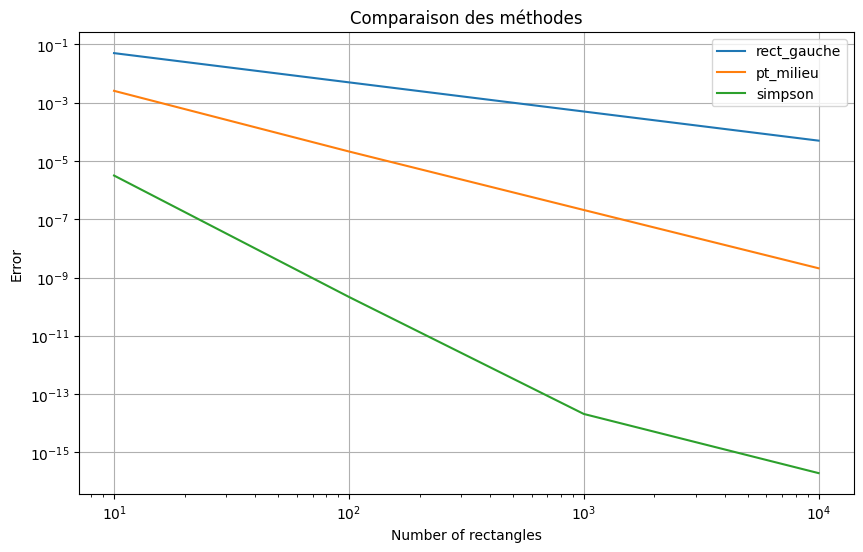

In [5]:
import matplotlib.pyplot as plt
Ns = [10**i for i in range(1,5)]
methodes = [rect_gauche, pt_milieu, simpson]

plt.figure(figsize=(10,6))
p=5
for methode in methodes:
    
    erreurs = []
    for N in Ns:
        approx_num = methode(power, N)
        erreur = abs(approx_num - 1/(p+1))
        erreurs.append(erreur)

    plt.plot(Ns, erreurs,label=methode.__name__)


plt.loglog();
plt.legend();
plt.grid(); plt.xlabel("Number of rectangles"); plt.ylabel('Error');
plt.title("Comparaison des méthodes");